In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, recall_score, precision_score
from tabulate import tabulate
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance




In [2]:
#warning
import warnings
warnings.filterwarnings("ignore")

After the data preprocessing steps in R, the resulting dataset, named modified_data, is clean, free of missing values, adjusted for outliers, and includes only the most relevant features. All categorical variables have been encoded properly, and therefore modified_data is strictly numerical and ready for modeling or analysis. The form prepared aims to provide better and more accurate results in the coming stages.

In [3]:
data = pd.read_csv("modified_data.csv")

In [4]:
data.head()

,Age,Class,Flight.Distance,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,Food.and.drink,Online.boarding,Seat.comfort,Inflight.entertainment,...,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Arrival.Delay.in.Minutes,satisfaction,Gender_Male,Customer.Type_disloyal.Customer,Type.of.Travel_Personal.Travel
0,0.076923,0.5,0.081997,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.6,0.75,0.8,1.0,1.0,0.032086,0,1,0,1
1,0.230769,1.0,0.036330,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,1.0,0.50,0.2,0.8,0.2,0.010695,0,0,1,0
2,0.243590,1.0,0.220418,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.6,0.75,0.8,0.8,1.0,0.000000,1,0,0,0
3,0.230769,1.0,0.102699,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,1.0,0.50,0.2,0.8,0.4,0.016043,0,0,0,0
4,0.692308,1.0,0.032068,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.8,0.75,0.6,0.6,0.6,0.000000,1,0,0,0


In [5]:
missingValues = data.isna().sum().sum()
missingValues

np.int64(0)

In [6]:
print("data shape:", data.shape)

data shape: (103386, 21)


In [7]:
data.describe()

,Age,Class,Flight.Distance,Departure.Arrival.time.convenient,Ease.of.Online.booking,Gate.location,Food.and.drink,Online.boarding,Seat.comfort,Inflight.entertainment,...,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Arrival.Delay.in.Minutes,satisfaction,Gender_Male,Customer.Type_disloyal.Customer,Type.of.Travel_Personal.Travel
count,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,...,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000,103386.000000
mean,0.414448,0.513740,0.229616,0.611744,0.551249,0.595216,0.640245,0.650233,0.688323,0.671996,...,0.670458,0.658007,0.660805,0.728352,0.657377,0.026670,0.433627,0.492378,0.182955,0.310593
std,0.192949,0.481422,0.201990,0.305205,0.279828,0.255554,0.265929,0.269981,0.263745,0.266569,...,0.263151,0.295230,0.252912,0.234942,0.262456,0.064918,0.495577,0.499944,0.386632,0.462739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.000000,0.072458,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.423077,0.500000,0.159529,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,0.800000,...,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.564103,1.000000,0.341587,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,0.800000,...,0.800000,1.000000,0.800000,1.000000,0.800000,0.023173,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Cross Validation

In [9]:
X = data.drop("satisfaction", axis=1)
y = data["satisfaction"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=412, stratify=y
)

In [11]:
X_train.shape

(82708, 20)

In [12]:
y_train.shape

(82708,)

In [13]:
y_test.shape

(20678,)

In [14]:
y_test.head()

,satisfaction
10958,0
74820,1
76378,0
44342,1
30602,0


In [15]:
#Modelling

In [16]:
#logistic regression

In [17]:
X_train_const = add_constant(X_train)

In [18]:
vif_df = pd.DataFrame()
vif_df["Feature"] = X_train_const.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]

In [19]:
print(vif_df)

                              Feature        VIF
0                               const  42.793769
1                                 Age   1.161497
2                               Class   1.934038
3                     Flight.Distance   1.340950
4   Departure.Arrival.time.convenient   1.656691
5              Ease.of.Online.booking   1.938271
6                       Gate.location   1.507416
7                      Food.and.drink   2.172350
8                     Online.boarding   1.843943
9                        Seat.comfort   2.389255
10             Inflight.entertainment   3.830416
11                   On.board.service   1.771021
12                   Leg.room.service   1.307945
13                   Baggage.handling   1.902359
14                    Checkin.service   1.225584
15                   Inflight.service   2.079427
16                        Cleanliness   2.867768
17           Arrival.Delay.in.Minutes   1.008428
18                        Gender_Male   1.010677
19    Customer.Type_

In [20]:
#Logistic regression model was successfully applied for satisfaction prediction. Among the variables found to be
#significant in the model, factors such as seat comfort, ease of online boarding, in-flight service quality and
# cleanliness stood out. Delays, loyalty status and travel purpose negatively affect satisfaction. There is no
#multicollinearity in the model  (all VIF < 5). Flight.Distance and Food.and.drink variables were  not found to be
#significant and were removed from the model.


In [21]:
log_model = LogisticRegression(max_iter=1000, random_state=412)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=412)

In [22]:
y_pred = log_model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8687010349163362
Confusion Matrix:
 [[10600  1111]
 [ 1604  7363]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     11711
           1       0.87      0.82      0.84      8967

    accuracy                           0.87     20678
   macro avg       0.87      0.86      0.87     20678
weighted avg       0.87      0.87      0.87     20678



In [24]:
X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.340713
         Iterations 7


In [25]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                82708
Model:                          Logit   Df Residuals:                    82687
Method:                           MLE   Df Model:                           20
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.5021
Time:                        12:43:59   Log-Likelihood:                -28180.
converged:                       True   LL-Null:                       -56598.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -6.5713      0.075    -87.059      0.000      -6.719      -6.423
Age                                  -0.7243      0.062    -11

In [26]:
cols_to_drop = ["Flight.Distance", "Food.and.drink"]

X_train_reduced = X_train.drop(columns=cols_to_drop)
X_test_reduced = X_test.drop(columns=cols_to_drop)

In [27]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train_reduced)
logit_model_reduced = sm.Logit(y_train, X_train_const)
result_reduced = logit_model_reduced.fit()
print(result_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.340729
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                82708
Model:                          Logit   Df Residuals:                    82689
Method:                           MLE   Df Model:                           18
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.5021
Time:                        12:44:06   Log-Likelihood:                -28181.
converged:                       True   LL-Null:                       -56598.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -6.6011      0.073    -90

In [28]:
summary_df = pd.DataFrame({
    "coef": result.params,
    "std err": result.bse,
    "z": result.tvalues,
    "P>|z|": result.pvalues
})

summary_df = summary_df.reset_index().rename(columns={"index": "Variable"})
summary_df = summary_df.round(4)
print(summary_df)

                             Variable    coef  std err        z   P>|z|
0                               const -6.5713   0.0755 -87.0590  0.0000
1                                 Age -0.7243   0.0616 -11.7624  0.0000
2                               Class  0.6198   0.0277  22.3818  0.0000
3                     Flight.Distance -0.0707   0.0613  -1.1538  0.2486
4   Departure.Arrival.time.convenient -0.5520   0.0457 -12.0881  0.0000
5              Ease.of.Online.booking  0.2364   0.0534   4.4283  0.0000
6                       Gate.location  0.1636   0.0512   3.1967  0.0014
7                      Food.and.drink -0.0666   0.0588  -1.1317  0.2578
8                     Online.boarding  3.6159   0.0548  66.0011  0.0000
9                        Seat.comfort  0.2542   0.0615   4.1313  0.0000
10             Inflight.entertainment  0.7656   0.0774   9.8929  0.0000
11                   On.board.service  1.5492   0.0558  27.7488  0.0000
12                   Leg.room.service  1.3637   0.0468  29.1253 

In [29]:
X_test_const = sm.add_constant(X_test_reduced)
y_pred_prob = result_reduced.predict(X_test_const)
y_pred = (y_pred_prob >= 0.5).astype(int)

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8688944772221685
Confusion Matrix:
 [[10608  1103]
 [ 1608  7359]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89     11711
           1       0.87      0.82      0.84      8967

    accuracy                           0.87     20678
   macro avg       0.87      0.86      0.87     20678
weighted avg       0.87      0.87      0.87     20678



In [31]:
cols_to_drop = ["Flight.Distance", "Food.and.drink"]
X_train_reduced = X_train.drop(columns=cols_to_drop)
X_test_reduced = X_test.drop(columns=cols_to_drop)

log_model_reduced = LogisticRegression(max_iter=1000, random_state=412)
log_model_reduced.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=1000, random_state=412)

In [32]:
y_train_pred = log_model_reduced.predict(X_train_reduced)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

Train Accuracy: 0.8681506021182956
Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     46844
           1       0.87      0.82      0.84     35864

    accuracy                           0.87     82708
   macro avg       0.87      0.86      0.86     82708
weighted avg       0.87      0.87      0.87     82708



In [33]:
y_pred = log_model_reduced.predict(X_test_reduced)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8686526743398781
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11711
           1       0.87      0.82      0.84      8967

    accuracy                           0.87     20678
   macro avg       0.87      0.86      0.87     20678
weighted avg       0.87      0.87      0.87     20678



In [34]:
# Predicted probabilities
train_pred_proba = log_model_reduced.predict_proba(X_train_reduced)[:, 1]
test_pred_proba = log_model_reduced.predict_proba(X_test_reduced)[:, 1]
# Class prediction
train_class = (train_pred_proba > 0.5).astype(int)
test_class = (test_pred_proba > 0.5).astype(int)

In [35]:
# Train confusion matrix
cm_train = confusion_matrix(y_train, train_class)
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()

# Test confusion matrix
cm_test = confusion_matrix(y_test, test_class)
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

# Performans metrics
performance_summary = pd.DataFrame({
    "Metric": ["Accuracy", "Kappa", "Sensitivity (Recall)", "Specificity"],
    "Train": [
        round(accuracy_score(y_train, train_class), 3),
        round(cohen_kappa_score(y_train, train_class), 3),
        round(recall_score(y_train, train_class), 3),
        round(tn_train / (tn_train + fp_train), 3)
    ],
    "Test": [
        round(accuracy_score(y_test, test_class), 3),
        round(cohen_kappa_score(y_test, test_class), 3),
        round(recall_score(y_test, test_class), 3),
        round(tn_test / (tn_test + fp_test), 3)
    ]
})

In [36]:
print(tabulate(performance_summary, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════════════╤═════════╤════════╕
│    │ Metric               │   Train │   Test │
╞════╪══════════════════════╪═════════╪════════╡
│  0 │ Accuracy             │   0.868 │  0.869 │
├────┼──────────────────────┼─────────┼────────┤
│  1 │ Kappa                │   0.73  │  0.731 │
├────┼──────────────────────┼─────────┼────────┤
│  2 │ Sensitivity (Recall) │   0.824 │  0.82  │
├────┼──────────────────────┼─────────┼────────┤
│  3 │ Specificity          │   0.902 │  0.906 │
╘════╧══════════════════════╧═════════╧════════╛


In [37]:
#Decision tree

In [38]:
dt_clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    random_state=412
)

dt_clf.fit(X_train, y_train)

y_train_pred = dt_clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

y_test_pred = dt_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.8873144073124728
Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     46844
           1       0.88      0.86      0.87     35864

    accuracy                           0.89     82708
   macro avg       0.89      0.88      0.88     82708
weighted avg       0.89      0.89      0.89     82708

Test Accuracy: 0.8894477222168489
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     11711
           1       0.88      0.86      0.87      8967

    accuracy                           0.89     20678
   macro avg       0.89      0.89      0.89     20678
weighted avg       0.89      0.89      0.89     20678



In [39]:
def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP)

metrics = {
    "Accuracy": [
        accuracy_score(y_train, y_train_pred),
        accuracy_score(y_test, y_test_pred)
    ],
    "Kappa": [
        cohen_kappa_score(y_train, y_train_pred),
        cohen_kappa_score(y_test, y_test_pred)
    ],
    "Sensitivity (Recall)": [
        recall_score(y_train, y_train_pred, pos_label=1),
        recall_score(y_test, y_test_pred, pos_label=1)
    ],
    "Specificity": [
        specificity_score(y_train, y_train_pred),
        specificity_score(y_test, y_test_pred)
    ]
}


In [40]:
df_metrics = pd.DataFrame(metrics)
df_metrics = df_metrics.T.reset_index()
df_metrics.columns = ["Metric", "Train", "Test"]

df_metrics["Train"] = df_metrics["Train"].round(3)
df_metrics["Test"] = df_metrics["Test"].round(3)

print(df_metrics.to_string(index=False))

              Metric  Train  Test
            Accuracy  0.887 0.889
               Kappa  0.770 0.774
Sensitivity (Recall)  0.859 0.860
         Specificity  0.909 0.912


In [41]:
print(tabulate(df_metrics, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════════════╤═════════╤════════╕
│    │ Metric               │   Train │   Test │
╞════╪══════════════════════╪═════════╪════════╡
│  0 │ Accuracy             │   0.887 │  0.889 │
├────┼──────────────────────┼─────────┼────────┤
│  1 │ Kappa                │   0.77  │  0.774 │
├────┼──────────────────────┼─────────┼────────┤
│  2 │ Sensitivity (Recall) │   0.859 │  0.86  │
├────┼──────────────────────┼─────────┼────────┤
│  3 │ Specificity          │   0.909 │  0.912 │
╘════╧══════════════════════╧═════════╧════════╛


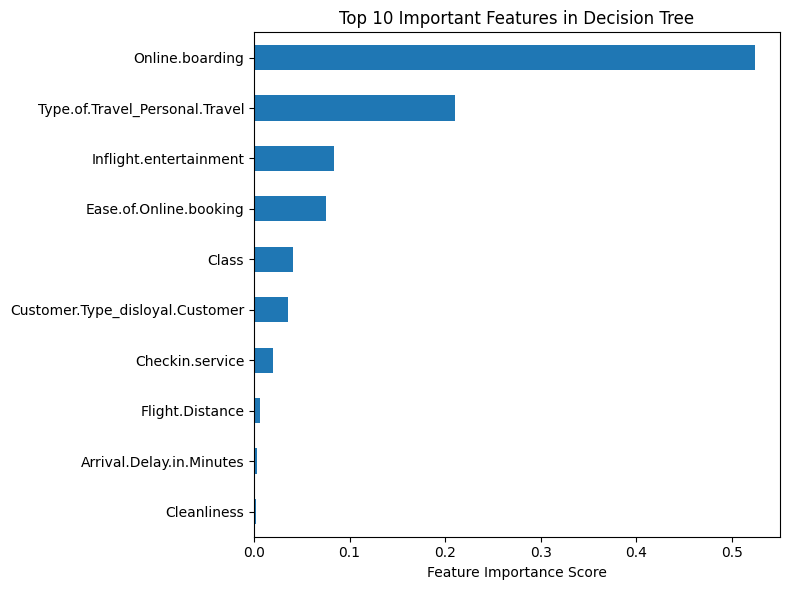

In [42]:
# feature importance
feature_importances = pd.Series(dt_clf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# first 10
plt.figure(figsize=(8, 6))
feature_importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features in Decision Tree")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

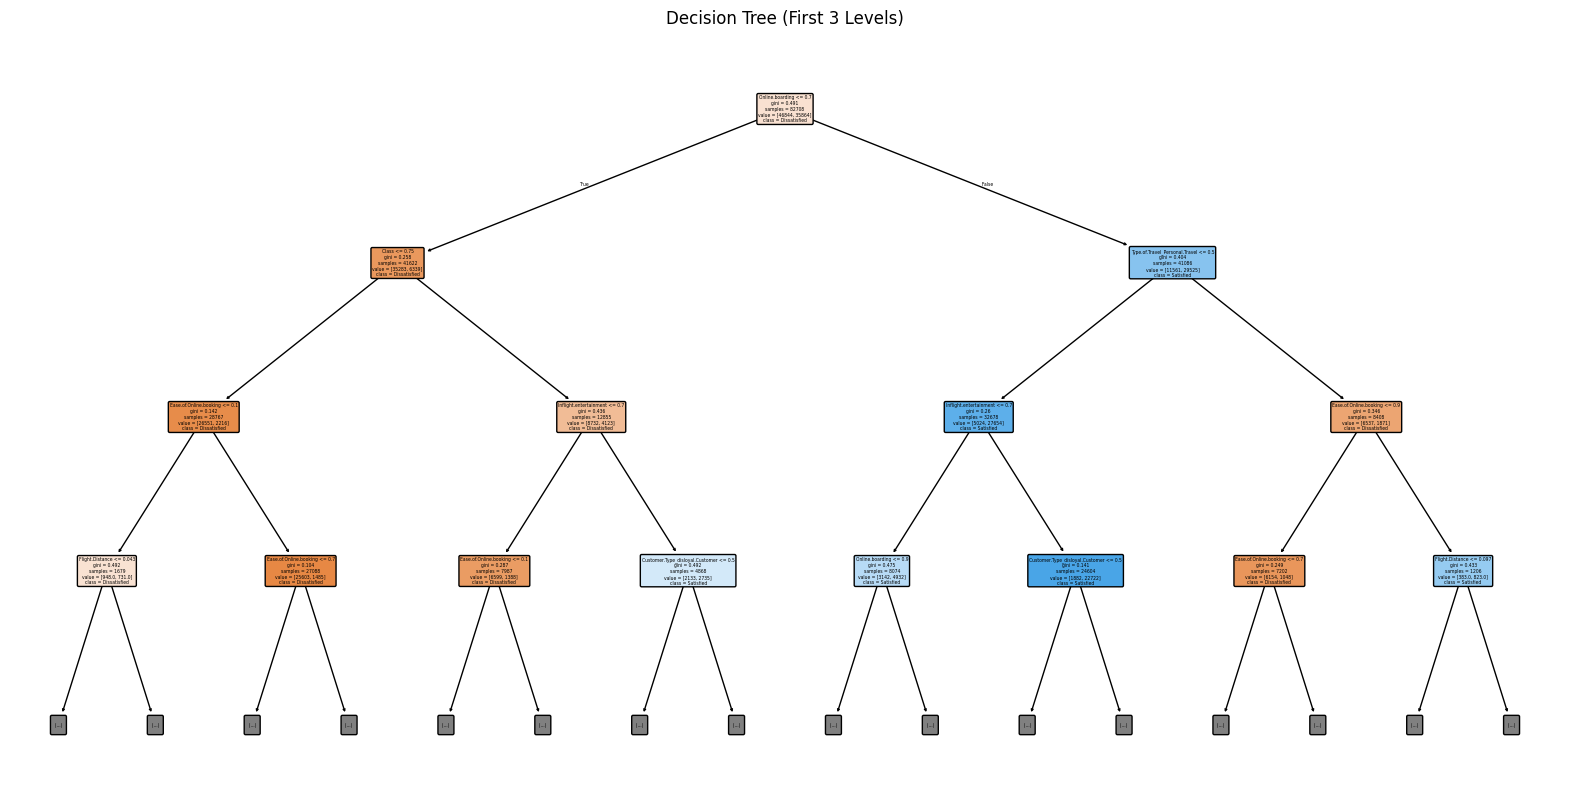

In [43]:
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X_train.columns, class_names=['Dissatisfied', 'Satisfied'],
          filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

In [44]:
#random forest

In [45]:
rf_clf_limited = RandomForestClassifier(
    random_state=412,
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=5,
    max_features='sqrt'
)

rf_clf_limited.fit(X_train, y_train)

y_train_pred = rf_clf_limited.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

y_test_pred = rf_clf_limited.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.9068772065580113
Train Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     46844
           1       0.92      0.86      0.89     35864

    accuracy                           0.91     82708
   macro avg       0.91      0.90      0.90     82708
weighted avg       0.91      0.91      0.91     82708

Test Accuracy: 0.9074378566592514
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     11711
           1       0.92      0.86      0.89      8967

    accuracy                           0.91     20678
   macro avg       0.91      0.90      0.90     20678
weighted avg       0.91      0.91      0.91     20678



In [46]:
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

metrics = {
    "Metric": ["Accuracy", "Kappa", "Sensitivity (Recall)", "Specificity"],
    "Train": [
        accuracy_score(y_train, y_train_pred),
        cohen_kappa_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        tn_train / (tn_train + fp_train)  # Specificity = TN / (TN + FP)
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        cohen_kappa_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        tn_test / (tn_test + fp_test)
    ]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.round(3))


                 Metric  Train   Test
0              Accuracy  0.907  0.907
1                 Kappa  0.809  0.810
2  Sensitivity (Recall)  0.865  0.860
3           Specificity  0.939  0.944


In [47]:
print(tabulate(df_metrics, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════════════╤══════════╤══════════╕
│    │ Metric               │    Train │     Test │
╞════╪══════════════════════╪══════════╪══════════╡
│  0 │ Accuracy             │ 0.906877 │ 0.907438 │
├────┼──────────────────────┼──────────┼──────────┤
│  1 │ Kappa                │ 0.809156 │ 0.810073 │
├────┼──────────────────────┼──────────┼──────────┤
│  2 │ Sensitivity (Recall) │ 0.864516 │ 0.859931 │
├────┼──────────────────────┼──────────┼──────────┤
│  3 │ Specificity          │ 0.939309 │ 0.943814 │
╘════╧══════════════════════╧══════════╧══════════╛


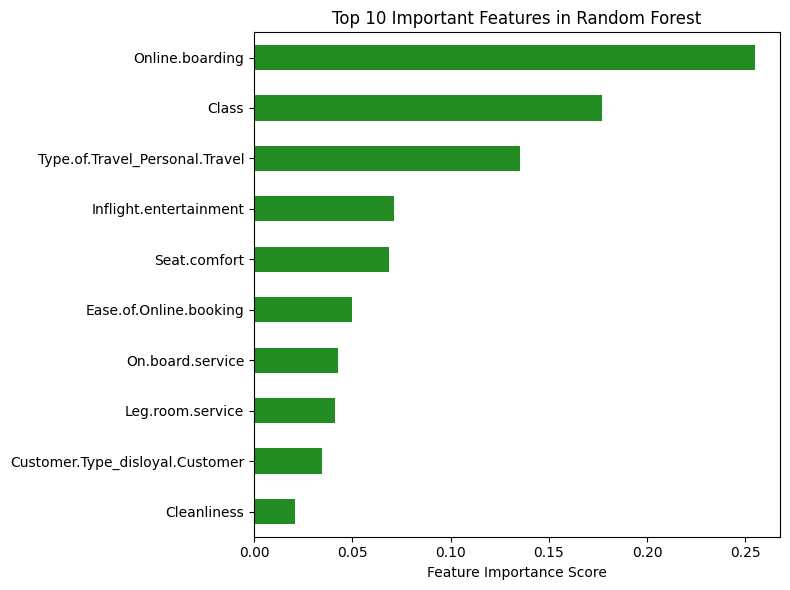

In [48]:

feature_importances_rf = pd.Series(rf_clf_limited.feature_importances_, index=X_train.columns)
feature_importances_rf = feature_importances_rf.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
feature_importances_rf.head(10).plot(kind='barh', color='forestgreen')
plt.title("Top 10 Important Features in Random Forest")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [49]:
#Bagging Classifier

In [50]:
base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=412)

bagging_clf = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=100,
    max_samples=0.8,
    max_features=1.0,
    random_state=412
)

bagging_clf.fit(X_train, y_train)

y_train_pred = bagging_clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

y_test_pred = bagging_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 0.8879673066692461
Train Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     46844
           1       0.88      0.86      0.87     35864

    accuracy                           0.89     82708
   macro avg       0.89      0.89      0.89     82708
weighted avg       0.89      0.89      0.89     82708

Test Accuracy: 0.8894960827933069
Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     11711
           1       0.88      0.87      0.87      8967

    accuracy                           0.89     20678
   macro avg       0.89      0.89      0.89     20678
weighted avg       0.89      0.89      0.89     20678



In [51]:
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

metrics = {
    "Metric": ["Accuracy", "Kappa", "Sensitivity (Recall)", "Specificity"],
    "Train": [
        accuracy_score(y_train, y_train_pred),
        cohen_kappa_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        tn_train / (tn_train + fp_train)
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        cohen_kappa_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        tn_test / (tn_test + fp_test)
    ]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.round(3))

                 Metric  Train   Test
0              Accuracy  0.888  0.889
1                 Kappa  0.772  0.775
2  Sensitivity (Recall)  0.865  0.866
3           Specificity  0.906  0.908


In [52]:
print(tabulate(df_metrics, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════════════╤══════════╤══════════╕
│    │ Metric               │    Train │     Test │
╞════╪══════════════════════╪══════════╪══════════╡
│  0 │ Accuracy             │ 0.887967 │ 0.889496 │
├────┼──────────────────────┼──────────┼──────────┤
│  1 │ Kappa                │ 0.77158  │ 0.774657 │
├────┼──────────────────────┼──────────┼──────────┤
│  2 │ Sensitivity (Recall) │ 0.864572 │ 0.865507 │
├────┼──────────────────────┼──────────┼──────────┤
│  3 │ Specificity          │ 0.905879 │ 0.907864 │
╘════╧══════════════════════╧══════════╧══════════╛


In [53]:
#XGBoost

In [54]:
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=412)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

y_test_pred = xgb_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9476713256275088
Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     46844
           1       0.95      0.92      0.94     35864

    accuracy                           0.95     82708
   macro avg       0.95      0.95      0.95     82708
weighted avg       0.95      0.95      0.95     82708

Test Accuracy: 0.9277976593480994
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11711
           1       0.93      0.90      0.92      8967

    accuracy                           0.93     20678
   macro avg       0.93      0.92      0.93     20678
weighted avg       0.93      0.93      0.93     20678



In [55]:

tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

metrics = {
    "Metric": ["Accuracy", "Kappa", "Sensitivity (Recall)", "Specificity"],
    "Train": [
        accuracy_score(y_train, y_train_pred),
        cohen_kappa_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        tn_train / (tn_train + fp_train)
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        cohen_kappa_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        tn_test / (tn_test + fp_test)
    ]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.round(3))

                 Metric  Train   Test
0              Accuracy  0.948  0.928
1                 Kappa  0.893  0.853
2  Sensitivity (Recall)  0.925  0.903
3           Specificity  0.965  0.947


In [56]:
print(tabulate(df_metrics, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════════════╤══════════╤══════════╕
│    │ Metric               │    Train │     Test │
╞════╪══════════════════════╪══════════╪══════════╡
│  0 │ Accuracy             │ 0.947671 │ 0.927798 │
├────┼──────────────────────┼──────────┼──────────┤
│  1 │ Kappa                │ 0.893097 │ 0.852519 │
├────┼──────────────────────┼──────────┼──────────┤
│  2 │ Sensitivity (Recall) │ 0.924967 │ 0.902643 │
├────┼──────────────────────┼──────────┼──────────┤
│  3 │ Specificity          │ 0.965054 │ 0.947058 │
╘════╧══════════════════════╧══════════╧══════════╛


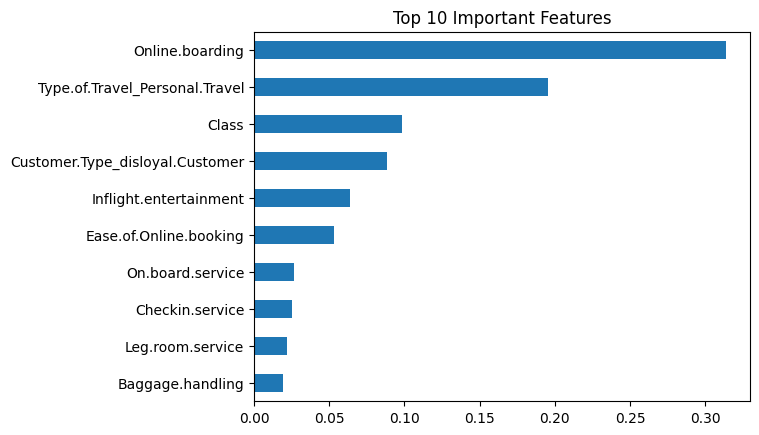

In [57]:
feature_importances = pd.Series(xgb_clf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

feature_importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [58]:
#KNN

In [59]:

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# PerformanCE metrics
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Train Accuracy: 0.9238404991052861
Test Accuracy: 0.8992649192378374

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     46844
           1       0.95      0.87      0.91     35864

    accuracy                           0.92     82708
   macro avg       0.93      0.92      0.92     82708
weighted avg       0.93      0.92      0.92     82708


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     11711
           1       0.92      0.84      0.88      8967

    accuracy                           0.90     20678
   macro avg       0.90      0.89      0.90     20678
weighted avg       0.90      0.90      0.90     20678


Confusion Matrix (Test Set):
[[11089   622]
 [ 1461  7506]]


In [60]:
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

metrics = {
    "Metric": ["Accuracy", "Kappa", "Sensitivity (Recall)", "Specificity"],
    "Train": [
        accuracy_score(y_train, y_train_pred),
        cohen_kappa_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        tn_train / (tn_train + fp_train)
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        cohen_kappa_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        tn_test / (tn_test + fp_test)
    ]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics.round(3))

                 Metric  Train   Test
0              Accuracy  0.924  0.899
1                 Kappa  0.844  0.793
2  Sensitivity (Recall)  0.875  0.837
3           Specificity  0.961  0.947


In [61]:
print(tabulate(df_metrics, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════════════════╤══════════╤══════════╕
│    │ Metric               │    Train │     Test │
╞════╪══════════════════════╪══════════╪══════════╡
│  0 │ Accuracy             │ 0.92384  │ 0.899265 │
├────┼──────────────────────┼──────────┼──────────┤
│  1 │ Kappa                │ 0.843581 │ 0.792645 │
├────┼──────────────────────┼──────────┼──────────┤
│  2 │ Sensitivity (Recall) │ 0.874888 │ 0.837069 │
├────┼──────────────────────┼──────────┼──────────┤
│  3 │ Specificity          │ 0.961318 │ 0.946888 │
╘════╧══════════════════════╧══════════╧══════════╛


In [62]:
#Linear SVC

In [63]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# LinearSVC model
svc_model = LinearSVC(max_iter=10000, random_state=412)
svc_model.fit(X_train, y_train)


y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)

# PerformanCE
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Train Accuracy: 0.8680055133723461
Test Accuracy: 0.8683625108811297

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     46844
           1       0.87      0.82      0.84     35864

    accuracy                           0.87     82708
   macro avg       0.87      0.86      0.86     82708
weighted avg       0.87      0.87      0.87     82708


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11711
           1       0.87      0.82      0.84      8967

    accuracy                           0.87     20678
   macro avg       0.87      0.86      0.86     20678
weighted avg       0.87      0.87      0.87     20678


Confusion Matrix (Test Set):
[[10635  1076]
 [ 1646  7321]]


In [64]:
#Stochastic Gradient Boosting

In [65]:

# Stochastic Gradient Boosting model
sgb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    subsample=0.8,
    max_depth=3,
    random_state=412
)


sgb_model.fit(X_train, y_train)


y_train_pred = sgb_model.predict(X_train)
y_test_pred = sgb_model.predict(X_test)


print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Train Set):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Train Accuracy: 0.9123301252599507
Test Accuracy: 0.9131444046813038

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     46844
           1       0.91      0.88      0.90     35864

    accuracy                           0.91     82708
   macro avg       0.91      0.91      0.91     82708
weighted avg       0.91      0.91      0.91     82708


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11711
           1       0.92      0.88      0.90      8967

    accuracy                           0.91     20678
   macro avg       0.91      0.91      0.91     20678
weighted avg       0.91      0.91      0.91     20678


Confusion Matrix (Test Set):
[[10979   732]
 [ 1064  7903]]


In [66]:
#Model comparision

In [67]:
models = {
    'Logistic Regression': log_model,
    'Decision Tree': dt_clf,
    'Random Forest': rf_clf_limited,
    'Bagging Classifier': bagging_clf,
    'XGBoost': xgb_clf,
    'KNN': knn_model,
    'Linear SVC': svc_model,
    'SGBoosting': sgb_model
}


In [68]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv = cv_scores.mean()
    std_cv = cv_scores.std()

    # Accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Predict
    y_pred = model.predict(X_test)

    # other metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # add results
    results.append({
        'Model': name,
        'Mean_CV': round(mean_cv, 4),
        'Std_CV': round(std_cv, 4),
        'Train_Score': round(train_score, 4),
        'Test_Score': round(test_score, 4),
        'Precision_Score': round(precision, 4),
        'Recall_Score': round(recall, 4),
        'F1_Score': round(f1, 4)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1_Score", ascending=False)


In [69]:
print(df_results)

                 Model  Mean_CV  Std_CV  Train_Score  Test_Score  \
4              XGBoost   0.9258  0.0027       0.9477      0.9278   
7           SGBoosting   0.9120  0.0026       0.9123      0.9131   
2        Random Forest   0.9055  0.0027       0.9069      0.9074   
5                  KNN   0.8974  0.0028       0.9238      0.8993   
3   Bagging Classifier   0.8876  0.0027       0.8880      0.8895   
1        Decision Tree   0.8866  0.0026       0.8873      0.8894   
0  Logistic Regression   0.8679  0.0029       0.8681      0.8687   
6           Linear SVC   0.8678  0.0028       0.8680      0.8684   

   Precision_Score  Recall_Score  F1_Score  
4           0.9289        0.9026    0.9156  
7           0.9152        0.8813    0.8980  
2           0.9214        0.8599    0.8896  
5           0.9235        0.8371    0.8782  
3           0.8779        0.8655    0.8717  
1           0.8821        0.8600    0.8709  
0           0.8689        0.8211    0.8443  
6           0.8719        0

In [71]:
print(df_results.to_string(index=False))

              Model  Mean_CV  Std_CV  Train_Score  Test_Score  Precision_Score  Recall_Score  F1_Score
            XGBoost   0.9258  0.0027       0.9477      0.9278           0.9289        0.9026    0.9156
         SGBoosting   0.9120  0.0026       0.9123      0.9131           0.9152        0.8813    0.8980
      Random Forest   0.9055  0.0027       0.9069      0.9074           0.9214        0.8599    0.8896
                KNN   0.8974  0.0028       0.9238      0.8993           0.9235        0.8371    0.8782
 Bagging Classifier   0.8876  0.0027       0.8880      0.8895           0.8779        0.8655    0.8717
      Decision Tree   0.8866  0.0026       0.8873      0.8894           0.8821        0.8600    0.8709
Logistic Regression   0.8679  0.0029       0.8681      0.8687           0.8689        0.8211    0.8443
         Linear SVC   0.8678  0.0028       0.8680      0.8684           0.8719        0.8164    0.8432


In [72]:
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════╤═══════════╤══════════╤═══════════════╤══════════════╤═══════════════════╤════════════════╤════════════╕
│    │ Model               │   Mean_CV │   Std_CV │   Train_Score │   Test_Score │   Precision_Score │   Recall_Score │   F1_Score │
╞════╪═════════════════════╪═══════════╪══════════╪═══════════════╪══════════════╪═══════════════════╪════════════════╪════════════╡
│  4 │ XGBoost             │    0.9258 │   0.0027 │        0.9477 │       0.9278 │            0.9289 │         0.9026 │     0.9156 │
├────┼─────────────────────┼───────────┼──────────┼───────────────┼──────────────┼───────────────────┼────────────────┼────────────┤
│  7 │ SGBoosting          │    0.912  │   0.0026 │        0.9123 │       0.9131 │            0.9152 │         0.8813 │     0.898  │
├────┼─────────────────────┼───────────┼──────────┼───────────────┼──────────────┼───────────────────┼────────────────┼────────────┤
│  2 │ Random Forest       │    0.9055 │   0.0027 │        0.9069 │  

In [73]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    # Accuracy
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    # Predict
    y_pred = model.predict(X_test)

    # other metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    # add results without mean_cv and std_cv
    results.append({
        'Model': name,
        'Train_Score': round(train_score, 4),
        'Test_Score': round(test_score, 4),
        'Precision_Score': round(precision, 4),
        'Recall_Score': round(recall, 4),
        'F1_Score': round(f1, 4)
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="F1_Score", ascending=False)

In [74]:
print(df_results)

                 Model  Train_Score  Test_Score  Precision_Score  \
4              XGBoost       0.9477      0.9278           0.9289   
7           SGBoosting       0.9123      0.9131           0.9152   
2        Random Forest       0.9069      0.9074           0.9214   
5                  KNN       0.9238      0.8993           0.9235   
3   Bagging Classifier       0.8880      0.8895           0.8779   
1        Decision Tree       0.8873      0.8894           0.8821   
0  Logistic Regression       0.8681      0.8687           0.8689   
6           Linear SVC       0.8680      0.8684           0.8719   

   Recall_Score  F1_Score  
4        0.9026    0.9156  
7        0.8813    0.8980  
2        0.8599    0.8896  
5        0.8371    0.8782  
3        0.8655    0.8717  
1        0.8600    0.8709  
0        0.8211    0.8443  
6        0.8164    0.8432  


In [75]:
print(df_results.to_string(index=False))

              Model  Train_Score  Test_Score  Precision_Score  Recall_Score  F1_Score
            XGBoost       0.9477      0.9278           0.9289        0.9026    0.9156
         SGBoosting       0.9123      0.9131           0.9152        0.8813    0.8980
      Random Forest       0.9069      0.9074           0.9214        0.8599    0.8896
                KNN       0.9238      0.8993           0.9235        0.8371    0.8782
 Bagging Classifier       0.8880      0.8895           0.8779        0.8655    0.8717
      Decision Tree       0.8873      0.8894           0.8821        0.8600    0.8709
Logistic Regression       0.8681      0.8687           0.8689        0.8211    0.8443
         Linear SVC       0.8680      0.8684           0.8719        0.8164    0.8432


In [76]:
print(tabulate(df_results, headers="keys", tablefmt="fancy_grid"))

╒════╤═════════════════════╤═══════════════╤══════════════╤═══════════════════╤════════════════╤════════════╕
│    │ Model               │   Train_Score │   Test_Score │   Precision_Score │   Recall_Score │   F1_Score │
╞════╪═════════════════════╪═══════════════╪══════════════╪═══════════════════╪════════════════╪════════════╡
│  4 │ XGBoost             │        0.9477 │       0.9278 │            0.9289 │         0.9026 │     0.9156 │
├────┼─────────────────────┼───────────────┼──────────────┼───────────────────┼────────────────┼────────────┤
│  7 │ SGBoosting          │        0.9123 │       0.9131 │            0.9152 │         0.8813 │     0.898  │
├────┼─────────────────────┼───────────────┼──────────────┼───────────────────┼────────────────┼────────────┤
│  2 │ Random Forest       │        0.9069 │       0.9074 │            0.9214 │         0.8599 │     0.8896 │
├────┼─────────────────────┼───────────────┼──────────────┼───────────────────┼────────────────┼────────────┤
│  5 │ KNN

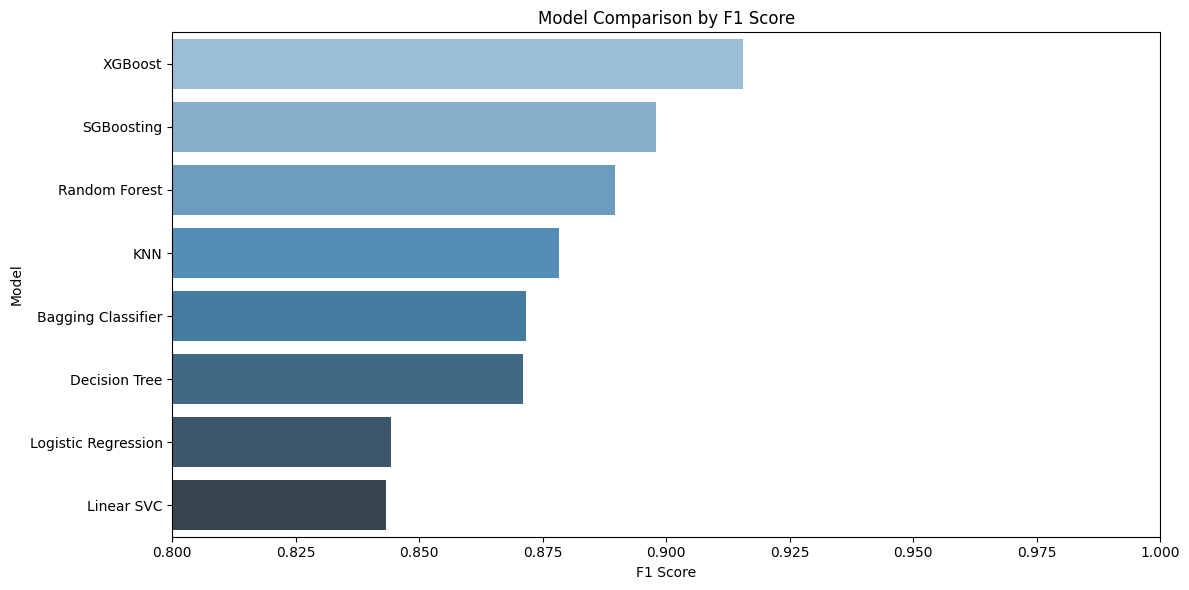

In [77]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x='F1_Score', y='Model', palette='Blues_d')
plt.title('Model Comparison by F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.xlim(0.8, 1.0)
plt.tight_layout()
plt.show()

In [78]:
#Feature importance

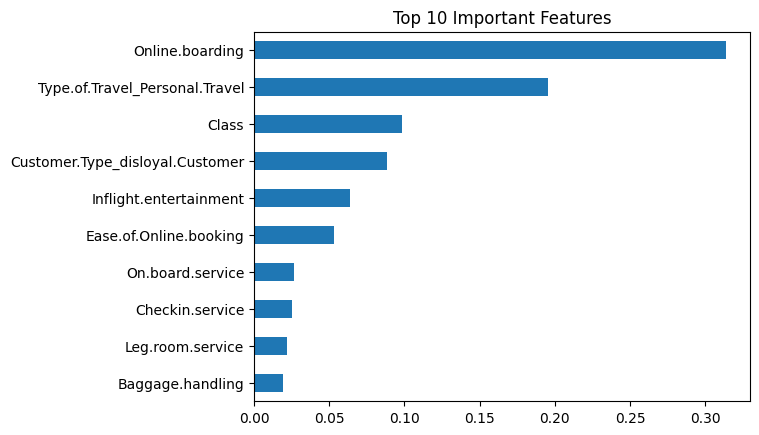

In [79]:
best_model = xgb_clf
feature_importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

feature_importances.head(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()
